## 🎯 Problemas de negócio

Com base nas aulas do módulo de Estatística, utilize os métodos da biblioteca Pandas para tratar o dicionário abaixo e:

- Trazer a média das vendas;
- Criar um gráfico de barras vertical mostrando o mês de referência e o valor;
- Criar um gráfico de linhas mostrando o mês de referência e o valor.

### Configurações do projeto

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import locale

In [2]:
# Definindo o locale para português do Brasil pois os meses eram exibidos em inglês
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')  # Para Windows

'Portuguese_Brazil.1252'

### Tratamento dos dados

In [3]:
# Dicionário de faturamento usado para responder as perguntas
dict_faturamento = {
    'data_ref': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
    'valor': [400000, 890000, 760000, 430000, 920000, 340000, 800000, 500000, 200000, 900000, 570000, 995000]
}

In [4]:
# Transformando o dicionário em um DataFrame
df_faturamento = pd.DataFrame.from_dict(dict_faturamento)
df_faturamento

,data_ref,valor
0,2024-01-01,400000
1,2024-02-01,890000
2,2024-03-01,760000
3,2024-04-01,430000
4,2024-05-01,920000
5,2024-06-01,340000
6,2024-07-01,800000
7,2024-08-01,500000
8,2024-09-01,200000
9,2024-10-01,900000


In [5]:
# Olhando os tipos de dados para entender se é necessário fazer alguma conversão
df_faturamento.dtypes

data_ref    object
valor        int64
dtype: object

In [6]:
# Transformando a coluna data_ref em datetime e a coluna valor em float
df_faturamento['data_ref'] = pd.to_datetime(df_faturamento['data_ref'])
df_faturamento['valor'] = df_faturamento['valor'].astype(float)

# Verificando novamente os tipos de dados
df_faturamento.dtypes

data_ref    datetime64[ns]
valor              float64
dtype: object

In [7]:
# Criando uma coluna de mes_ref para facilitar a análise
df_faturamento['mes_ref'] = df_faturamento['data_ref'].dt.strftime('%B').str.capitalize()  # Nome do mês completo
df_faturamento

,data_ref,valor,mes_ref
0,2024-01-01,400000.0,Janeiro
1,2024-02-01,890000.0,Fevereiro
2,2024-03-01,760000.0,Março
3,2024-04-01,430000.0,Abril
4,2024-05-01,920000.0,Maio
5,2024-06-01,340000.0,Junho
6,2024-07-01,800000.0,Julho
7,2024-08-01,500000.0,Agosto
8,2024-09-01,200000.0,Setembro
9,2024-10-01,900000.0,Outubro


### Resolução dos problemas

##### Média das vendas

In [8]:
# Calculando a média do faturamento
media_faturamento = df_faturamento['valor'].mean()

In [9]:
# Usando o plotly para criar um visual de cartão (big number) com a média do faturamento
fig = go.Figure(go.Indicator(
    mode="number",
    value=media_faturamento,
    number={"valueformat": ".2f"}, # Traz o número completo com duas casas decimais
    title={"text": "Média de vendas"}
))

fig.show()

##### Valor das vendas por mês

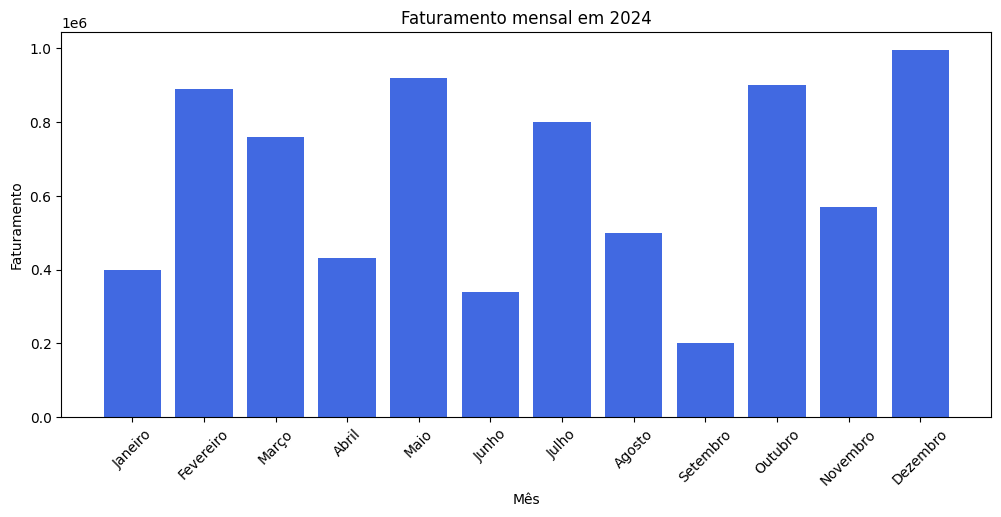

In [10]:
# Exibindo o gráfico de barras vertificais com o faturamento mensal
plt.figure(figsize=(12,5))
plt.bar(df_faturamento['mes_ref'], df_faturamento['valor'], color='royalblue')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.title('Faturamento mensal em 2024')
plt.xticks(rotation=45) 
plt.show()

##### Série temporal das vendas

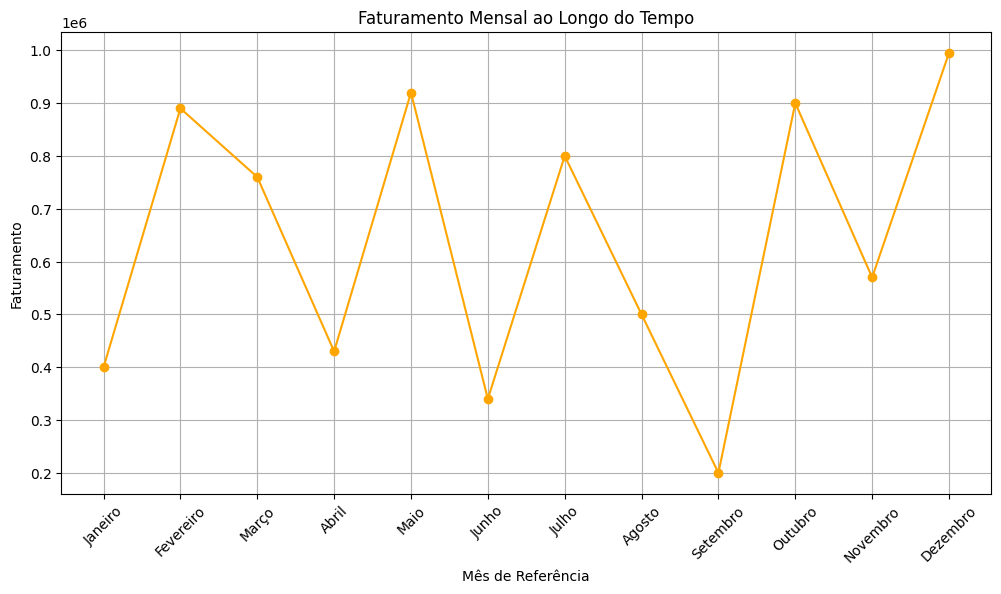

In [11]:
# Exibindo o gráfico de linhas com o faturamento mensal
plt.figure(figsize=(12, 6))
plt.plot(df_faturamento['mes_ref'], df_faturamento['valor'], marker='o', linestyle='-', color='orange')
plt.xlabel('Mês de Referência')
plt.ylabel('Faturamento')
plt.title('Faturamento Mensal ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()